In [1]:
# !pip install scikit-optimize
# !pip install lazypredict
# !pip install lightgbm

In [14]:
import pandas as pd 
import numpy as np
import sklearn
import pickle
import matplotlib.pyplot as plt
import lazypredict
import xgboost as xgb

# from skopt import BayesSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score

from lazypredict.Supervised import LazyClassifier
import lightgbm as lgb

In [4]:
def make_submission(preds):
    assert len(preds) == 5000
    
    # Read labels
    with open('test_labels_sorted.npy', 'rb') as f:
        test_labels = np.load(f)
    len(test_labels)
    
    submission = pd.DataFrame(columns=['id', 'class'])
    for label, pred in zip(test_labels, preds):
        submission = submission.append({'id': label, 'class': pred}, ignore_index=True)
    return submission

In [5]:
def plot_confusion_matrix(y_val_from_train, y_pred_from_train):
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_val_from_train, y_pred_from_train))
    cmp.plot(ax=ax)
    plt.show()

# Load X_train, y_train, X_test

In [6]:
# Load X_train
with open('X_train_15.npy', 'rb') as f:
    X_train = np.load(f)
print(X_train.shape)
X_train

(9000, 15)


array([[ 1.59010940e-01,  5.44393051e-01,  2.96363794e-01, ...,
         1.95744138e-01,  6.51402400e+00,  9.69951000e+00],
       [ 1.74547752e-01,  6.17015065e-01,  3.80707590e-01, ...,
         1.49178761e-01,  7.63271500e+00,  9.89703100e+00],
       [-1.61696002e+00,  8.51122136e-01,  7.24408891e-01, ...,
         1.75405135e-01,  7.25143900e+00,  9.76475100e+00],
       ...,
       [-4.06112460e-01,  6.55641942e-01,  4.29866356e-01, ...,
         2.86305270e-01,  7.59620300e+00,  1.02860890e+01],
       [ 8.15228667e-03,  6.80594980e-01,  4.63209527e-01, ...,
         7.55430442e-01,  6.50085600e+00,  1.11833160e+01],
       [-5.17633651e-01,  5.38173469e-01,  2.89630682e-01, ...,
         1.22059914e-01,  6.73848100e+00,  8.35995400e+00]])

In [7]:
# Load y_train
with open('y_train.npy', 'rb') as f:
    y_train = np.load(f)
print(y_train.shape)
y_train

(9000,)


array([ 7, 13,  6, ...,  3,  3, 18], dtype=int64)

In [8]:
# Load X_train
with open('X_test_15.npy', 'rb') as f:
    X_test = np.load(f)
print(X_test.shape)
X_test

(5000, 15)


array([[-3.05412347e-01,  7.42857043e-01,  5.51836586e-01, ...,
         9.31247768e-01,  5.64133800e+00,  1.09385090e+01],
       [-3.54157081e-01,  7.94335631e-01,  6.30969095e-01, ...,
         1.92938837e-01,  6.62535500e+00,  8.55747500e+00],
       [-8.47212227e-01,  3.84535013e-01,  1.47867176e-01, ...,
         1.52392192e-01,  7.74883400e+00,  9.79108800e+00],
       ...,
       [ 4.29758667e-03,  3.23994204e-01,  1.04972244e-01, ...,
         2.34882744e-01,  6.26023900e+00,  8.59518400e+00],
       [-1.05151830e+00,  5.01833910e-01,  2.51837273e-01, ...,
         2.30707159e-01,  7.61296300e+00,  9.55705400e+00],
       [-5.40031205e-01,  4.61364725e-01,  2.12857410e-01, ...,
         4.24188449e-01,  5.58268000e+00,  1.06530010e+01]])

# Train Validation Split

In [11]:
# Create validation data
# Train/test sets
X_train_from_train, X_val_from_train, y_train_from_train, y_val_from_train = train_test_split(X_train, y_train, test_size=0.222, random_state=42, shuffle=False)

# Lazy Classifier

In [9]:
# Lazy Classifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_from_train, X_val_from_train, y_train_from_train, y_val_from_train)
models

100%|██████████| 29/29 [00:13<00:00,  2.16it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.94,0.94,None,0.94,0.72
ExtraTreesClassifier,0.93,0.93,None,0.93,0.43
RandomForestClassifier,0.91,0.91,None,0.91,1.26
BaggingClassifier,0.90,0.90,None,0.90,0.53
SVC,0.89,0.89,None,0.89,0.59
LabelSpreading,0.89,0.88,None,0.89,1.87
LabelPropagation,0.88,0.88,None,0.88,1.20
LinearDiscriminantAnalysis,0.87,0.87,None,0.87,0.02
LogisticRegression,0.88,0.87,None,0.87,0.41


## ETC Classifier

### Bayes Search CV

In [10]:
param_grid = {
    "max_depth": [5, 13, 15, 20, 25, 50],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 3, 5, 7],
#     "n_estimators": [100, 200, 500, 1000, 5000], 
}

In [11]:
etc = ExtraTreesClassifier(random_state=42, n_jobs=-1, warm_start=True, class_weight="balanced")
# cv = RepeatedStratifiedKFold(n_splits=7, random_state=1)
bs = BayesSearchCV(etc, param_grid, verbose=1, n_jobs=-1)

In [12]:
# Fit on train-validation data
bs.fit(X_train_from_train, y_train_from_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(estimator=ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,
                                             random_state=42, warm_start=True),
              n_jobs=-1,
              search_spaces={'max_depth': [5, 13, 15, 20, 25, 50],
                             'min_samples_leaf': [1, 3, 5, 7],
                             'min_samples_split': [2, 5, 10, 15]},
              verbose=1)

In [17]:
# Print the best parameters found
print(bs.best_params_)
print(bs.best_score_)
print(bs.best_estimator_)

OrderedDict([('max_depth', 50), ('min_samples_leaf', 1), ('min_samples_split', 2)])
0.9169934640522875
ExtraTreesClassifier(class_weight='balanced', max_depth=50, n_jobs=-1,
                     random_state=42, warm_start=True)


In [18]:
# Validation predict
y_pred_from_train = bs.predict(X_val_from_train)

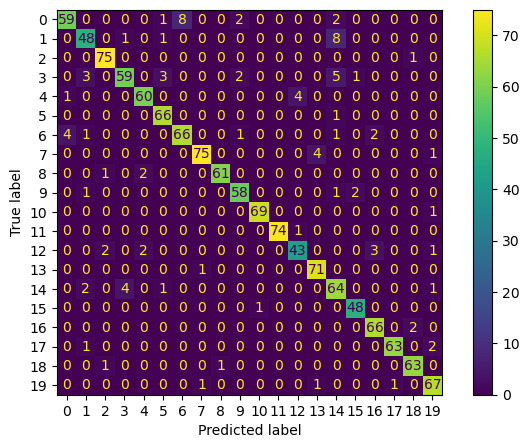

In [19]:
# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_val_from_train, y_pred_from_train))
cmp.plot(ax=ax)
plt.show()

In [21]:
# Accuracy Score
accuracy_score(y_val_from_train, y_pred_from_train) #92.5 with cv; 92.9 without

0.9296296296296296

### Re-train best estimator using Grid Search CV on best params (and close neighbors) and use all training data

In [22]:
param_grid = {
    "max_depth": [25, 30, 35],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1],
    "n_estimators": [500],
}

In [24]:
# cv = RepeatedStratifiedKFold(n_splits=7, random_state=1)

etc = ExtraTreesClassifier(random_state=42, n_jobs=-1, warm_start=True, class_weight="balanced")

bs = GridSearchCV(etc, param_grid, verbose=1, n_jobs=-1)

In [25]:
# Fit on train-validation data
bs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,
                                            random_state=42, warm_start=True),
             n_jobs=-1,
             param_grid={'max_depth': [25, 30, 35], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [500]},
             verbose=1)

In [27]:
# Print the best parameters found
print(bs.best_params_)
print(bs.best_score_)
print(bs.best_estimator_) # 0.927 with cv; 0.926 without

{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.9268888888888889
ExtraTreesClassifier(class_weight='balanced', max_depth=25, n_estimators=500,
                     n_jobs=-1, random_state=42, warm_start=True)


### Create final prediction

In [28]:
# Make test preds
preds = bs.predict(X_test)
print(preds.shape, preds)

(5000,) [ 3  4  5 ... 18  5  1]


In [29]:
submission = make_submission(preds)
submission

,id,class
0,10001,3
1,10002,4
2,10004,5
3,10008,20
4,10009,5
...,...,...
4995,23986,9
4996,23991,12
4997,23992,18
4998,23998,5


In [30]:
submission.to_csv('submission_15f_etc_bs_and_gs_1000_no_cv.csv', index=False)

## Gradient Boosting Classifier

In [60]:
param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8, 13],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
#     "n_estimators": [100, 200, 500, 1000, 5000],
}

In [63]:
cv = RepeatedStratifiedKFold(n_splits=3, random_state=1)
gb = GradientBoostingClassifier()
bs = BayesSearchCV(gb, param_grid, verbose=1, cv=cv, n_jobs=-1)

In [64]:
%%time
bs.fit(X_train_from_train, y_train_from_train)

Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for eac

BayesSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=1),
              estimator=GradientBoostingClassifier(), n_jobs=-1,
              search_spaces={'criterion': ['friedman_mse', 'mae'],
                             'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1,
                                               0.15, 0.2],
                             'loss': ['deviance'], 'max_depth': [3, 5, 8, 13],
                             'max_features': ['log2', 'sqrt'],
                             'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                             'min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                             'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0

In [65]:
# Print the best parameters found
print(bs.best_params_)
print(bs.best_score_)
print(bs.best_estimator_)

OrderedDict([('criterion', 'friedman_mse'), ('learning_rate', 0.2), ('loss', 'deviance'), ('max_depth', 8), ('max_features', 'sqrt'), ('min_samples_leaf', 0.1), ('min_samples_split', 0.17272727272727273), ('subsample', 0.85)])
0.8922875816993463
GradientBoostingClassifier(learning_rate=0.2, max_depth=8, max_features='sqrt',
                           min_samples_leaf=0.1,
                           min_samples_split=0.17272727272727273,
                           subsample=0.85)


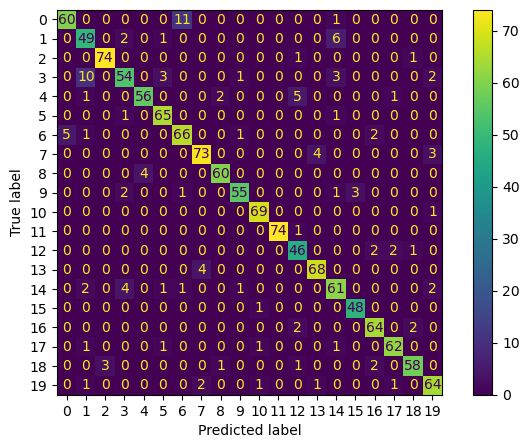

In [66]:
y_pred_from_train = bs.predict(X_val_from_train)
plot_confusion_matrix(y_val_from_train, y_pred_from_train)

In [67]:
accuracy_score(y_val_from_train, y_pred_from_train)

0.9081481481481481

## SVC

In [68]:
param_grid = {
    "C": [0.1, 1, 10, 50, 100, 125, 150, 200, 250, 300, 350],
    "kernel": ['linear', 'poly'],
    "degree":[1, 2, 5, 8],
    "gamma": ["auto"],
}

In [69]:
cv = RepeatedStratifiedKFold(n_splits=3, random_state=1)
svc = SVC()
bs = BayesSearchCV(svc, param_grid, verbose=1, cv=cv, n_jobs=-1)

In [70]:
%%time
bs.fit(X_train_from_train, y_train_from_train)

Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for eac

BayesSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=1),
              estimator=SVC(), n_jobs=-1,
              search_spaces={'C': [0.1, 1, 10, 50, 100, 125, 150, 200, 250, 300,
                                   350],
                             'degree': [1, 2, 5, 8], 'gamma': ['auto'],
                             'kernel': ['linear', 'poly']},
              verbose=1)

In [71]:
# Print the best parameters found
print(bs.best_params_)
print(bs.best_score_)
print(bs.best_estimator_)

OrderedDict([('C', 150.0), ('degree', 2), ('gamma', 'auto'), ('kernel', 'poly')])
0.9120392156862747
SVC(C=150.0, degree=2, gamma='auto', kernel='poly')


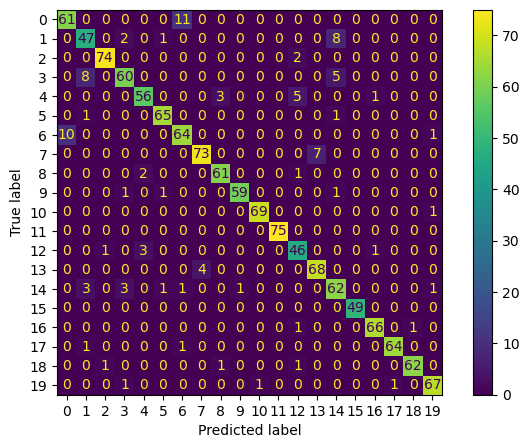

In [72]:
y_pred_from_train = bs.predict(X_val_from_train)
plot_confusion_matrix(y_val_from_train, y_pred_from_train)

In [73]:
accuracy_score(y_val_from_train, y_pred_from_train)

0.9244444444444444

### SVC with Grid Search 

In [52]:
# TODO
param_grid = {
    "C": [75, 100, 150, 200],
    "kernel": ['linear'],
    "degree":[1, 2],
    "gamma": [0.00021917],
}

In [53]:
# cv = RepeatedStratifiedKFold(n_splits=3, random_state=1)
svc = SVC()
grid = GridSearchCV(svc, param_grid, verbose=1, n_jobs=-1) # 0.90

In [54]:
%%time
grid.fit(X_train_from_train, y_train_from_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Wall time: 3.89 s


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [75, 100, 150, 200], 'degree': [1, 2],
                         'gamma': [0.00021917], 'kernel': ['linear']},
             verbose=1)

In [55]:
# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'C': 150, 'degree': 1, 'gamma': 0.00021917, 'kernel': 'linear'}
0.9092810457516339
SVC(C=150, degree=1, gamma=0.00021917, kernel='linear')


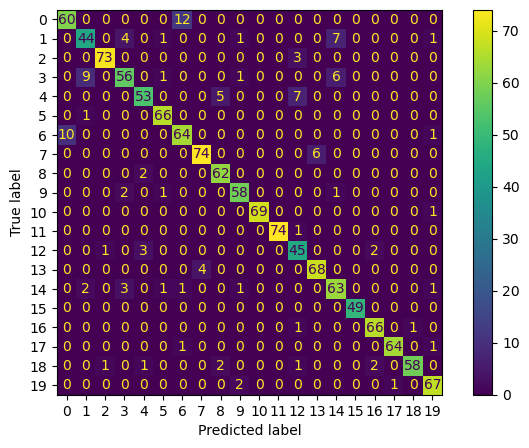

In [56]:
y_pred_from_train = bs.predict(X_val_from_train)
plot_confusion_matrix(y_val_from_train, y_pred_from_train)

## Logistic Regression

In [115]:
param_grid = {
    "C": [0.1, 1, 10, 50, 100, 125, 150, 200, 250, 300, 350],
    "penalty": ['l2'],
    "solver": ['newton-cg', 'lbfgs']
}

In [116]:
scorer = sklearn.metrics.make_scorer(sklearn.metrics.accuracy_score)
cv = RepeatedStratifiedKFold(n_splits=3, random_state=1)
clf = LogisticRegression(random_state=69, multi_class='multinomial', warm_start=True)
bs = BayesSearchCV(clf, param_grid, verbose=1, n_jobs=-1, cv=cv)

In [117]:
%%time
bs.fit(X_train_from_train, y_train_from_train)

Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for eac

BayesSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=1),
              estimator=LogisticRegression(multi_class='multinomial',
                                           random_state=69, warm_start=True),
              n_jobs=-1,
              search_spaces={'C': [0.1, 1, 10, 50, 100, 125, 150, 200, 250, 300,
                                   350],
                             'penalty': ['l2'],
                             'solver': ['newton-cg', 'lbfgs']},
              verbose=1)

In [118]:
# Print the best parameters found
# print(bs.best_params_)
print(bs.best_score_)
print(bs.best_estimator_)

0.8991372549019606
LogisticRegression(C=350.0, multi_class='multinomial', random_state=69,
                   solver='newton-cg', warm_start=True)


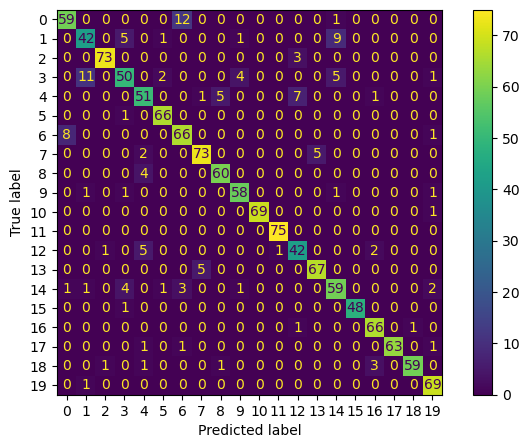

In [119]:
y_pred_from_train = bs.predict(X_val_from_train)
plot_confusion_matrix(y_val_from_train, y_pred_from_train)

In [120]:
accuracy_score(y_val_from_train, y_pred_from_train)

0.9

# Classification Accuracy

In [10]:
cv = RepeatedStratifiedKFold(n_splits=5, random_state=1)

### ETC

In [32]:
etc = ExtraTreesClassifier(class_weight='balanced', max_depth=25, n_estimators=500,n_jobs=-1, random_state=42, warm_start=True)

In [33]:
results = cross_val_score(etc, X_train_from_train, y_train_from_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(results.mean())

0.9132534006322015


In [35]:
etc.fit(X_train_from_train, y_train_from_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=25, n_estimators=500,
                     n_jobs=-1, random_state=42, warm_start=True)

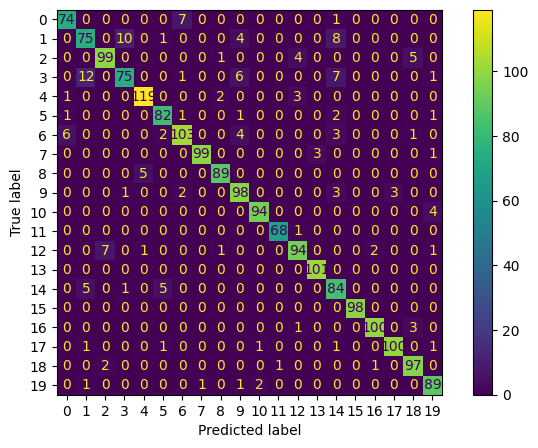

In [36]:
y_pred_from_train = etc.predict(X_val_from_train)
plot_confusion_matrix(y_val_from_train, y_pred_from_train)

### LGBM

In [26]:
lgbm = lgb.LGBMClassifier(colsample_bytree=0.6963542039594772, learning_rate=0.07,
               max_bin=400, max_depth=13, num_leaves=50, objective='multiclass',
               reg_alpha=0.3, reg_lambda=0, subsample=0.7)

In [27]:
results = cross_val_score(lgbm, X_train_from_train, y_train_from_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(results.mean())

0.9161386254716019


In [37]:
lgbm.fit(X_train_from_train, y_train_from_train)

LGBMClassifier(colsample_bytree=0.6963542039594772, learning_rate=0.07,
               max_bin=400, max_depth=13, num_leaves=50, objective='multiclass',
               reg_alpha=0.3, reg_lambda=0, subsample=0.7)

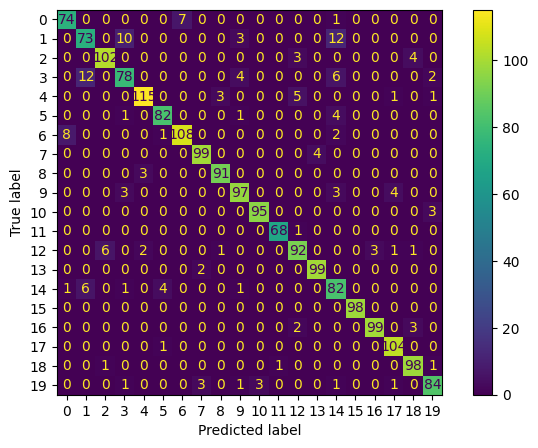

In [39]:
y_pred_from_train = lgbm.predict(X_val_from_train)
plot_confusion_matrix(y_val_from_train, y_pred_from_train)

### Gradient Boosting

In [19]:
gb = GradientBoostingClassifier(learning_rate=0.2, max_depth=8, max_features='sqrt',
                           min_samples_leaf=0.1,
                           min_samples_split=0.17272727272727273,
                           subsample=0.85)

In [20]:
results = cross_val_score(gb, X_train_from_train, y_train_from_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(results.mean())

0.8981583052921382


In [40]:
gb.fit(X_train_from_train, y_train_from_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=8, max_features='sqrt',
                           min_samples_leaf=0.1,
                           min_samples_split=0.17272727272727273,
                           subsample=0.85)

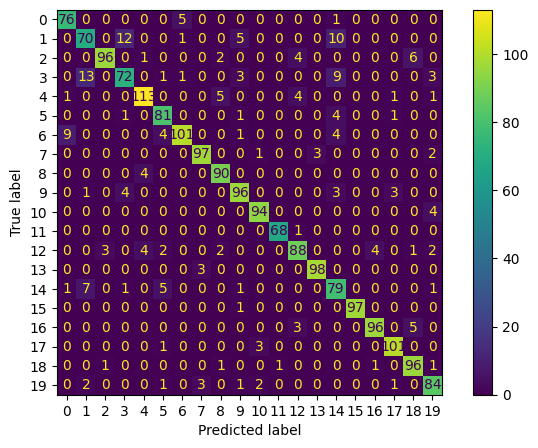

In [41]:
y_pred_from_train = gb.predict(X_val_from_train)
plot_confusion_matrix(y_val_from_train, y_pred_from_train)

### SVC 

In [28]:
svc = SVC(C=150.0, degree=2, gamma='auto', kernel='poly')

In [29]:
results = cross_val_score(svc, X_train_from_train, y_train_from_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(results.mean())

0.9142106964413174


In [42]:
svc.fit(X_train_from_train, y_train_from_train)

SVC(C=150.0, degree=2, gamma='auto', kernel='poly')

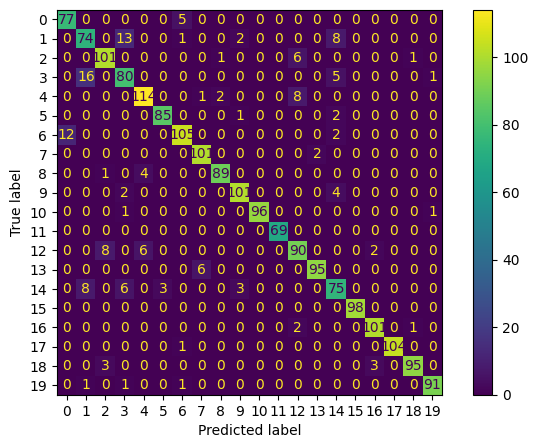

In [43]:
y_pred_from_train = svc.predict(X_val_from_train)
plot_confusion_matrix(y_val_from_train, y_pred_from_train)

### Logistic Regression

In [30]:
lr = LogisticRegression(C=350.0, multi_class='multinomial', random_state=69,solver='newton-cg', warm_start=True)

In [31]:
results = cross_val_score(lr, X_train_from_train, y_train_from_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(results.mean())

0.9027994493728968


In [44]:
lr.fit(X_train_from_train, y_train_from_train)

LogisticRegression(C=350.0, multi_class='multinomial', random_state=69,
                   solver='newton-cg', warm_start=True)

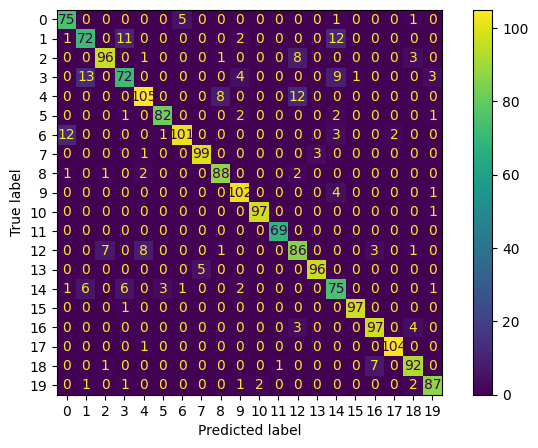

In [45]:
y_pred_from_train = lr.predict(X_val_from_train)
plot_confusion_matrix(y_val_from_train, y_pred_from_train)